# Stroop Test

Project description can be found [here](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True).

**Q1: What is our independent variable? What is our dependent variable?**

**Answer:**

Independent variable - the two conditions: *congruent words* and *incongruent words*.

Dependent variable - the time it takes to name the ink colors in equally-sized lists under each condition.

**Q2: What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.**

**Answer:**

Based on the two samples, our null hypothesis can be worded as follows: the population average time it takes to name the ink colors under the congruent words condition doesn't differ from the population average time it takes to name the ink colors under the incongruent words condition. In mathematical notation, it would look like this:

$H_0: \mu_{cw} = \mu_{iw}$

or

$H_0: \mu_{cw} - \mu_{iw} = 0$, where:

$H_0$ - null hypothesis

$\mu_{cw}$ - the population average time it takes to name the ink colors under the congruent words condition

$\mu_{iw}$ - the population average time it takes to name the ink colors under the incongruent words condition


The alternative hypothesis can be either two-tailed (non-directional) or one-tailed (directional). A two-tailed one would just mean that the two population average times are different, that is $\mu_{cw} \ne \mu_{iw}$. However, I believe that, presented with incongruent words, the brain will need to do an additional check to see if the written and displayed colors match and make necessary corrections if they don't before the person names the final color, which naturally would take some time. Thus, it would be more interesting to test our null hypothesis against a one-sided one, stating that, on average, it takes more time to name the ink colors under the incongruent words condition than it does under the congruent words condition. Now to the math notation:

$H_a: \mu_{iw} \gt \mu_{cw}$ 

or

$H_a: \mu_{iw} - \mu_{cw} \gt 0$, where

$H_a$ - alternative hypothesis

$\mu_{cw}$, $\mu_{iw}$ - population average times explained above

To sum it all up, we'll be checking our null hypothesis against a one-tailed directional one using the dependent t-test for paired samples since we're dealing with the repeated measures design and the two measurements come from the same people. The z-test is not applicable to this problem, because the population parameters (mean and standard deviation) are unknown and we're reduced to simply making inferences about them based on the samples given; moreover, sample sizes are relatively small (24 data points), which makes the t-test a more suitable choice. The t-test assumes that the samples were selected from a normally distributed population, an assumption that seems to be corroborated by the visualizations below.

In [1]:
# loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
stroop = pd.read_csv('../data/stroopdata.csv')

In [3]:
stroop.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [29]:
# let's see some statistics about our dataset
stroop.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [82]:
print 'median time for the congruent words condition is {} seconds'.format(stroop.Congruent.median())
print 'median time for the incongruent words condition is {} seconds'.format(stroop.Incongruent.median())

median time for the congruent words condition is 14.3565 seconds
median time for the incongruent words condition is 21.0175 seconds


In [70]:
print 'Congruent sample size is', len(stroop.Congruent.unique())
print 'Incongruent sample size is', len(stroop.Incongruent.unique())

Congruent sample size is 24
Incongruent sample size is 24


**Q3: Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.**

**Answer:**

The size of both samples is 24 (which is to be expected: these are paired samples), so we have 23 degrees of freedom in this case. Since each of the 24 data points in the two samples is unique, it makes no sense to report the mode, so we'll do with the median and the mean. 

For the **Congruent** sample, **the mean is 14.051125** and **the median is 14.3565**. For the **Incongruent** sample, **the mean is 22.015917** and **the median is 21.0175**.

As, by default, the **describe()** method reports the standard deviation for **n - 1** degrees of freedom (which is the standard deviation of a sample used to assess the population standard deviation), we can use this measure as well. So, for the **Congruent** sample, **the standard deviation is 3.559358**; for the **Incongruent** sample, **the standard deviation is 4.797057**.

**Q4: Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.**

**Answer:**

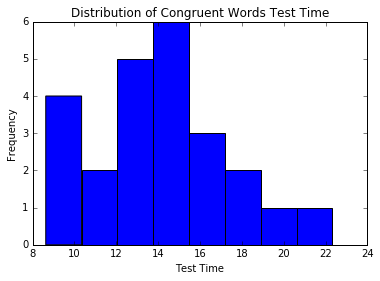

In [73]:
plt.hist(stroop.Congruent, bins=8)
plt.xlabel('Test Time')
plt.ylabel('Frequency')
plt.title('Distribution of Congruent Words Test Time')
plt.show()

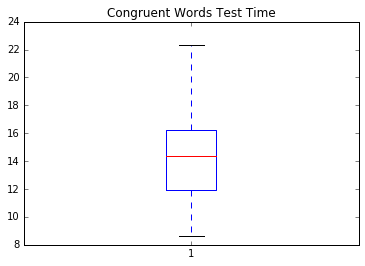

In [49]:
plt.boxplot(stroop.Congruent)
plt.title('Congruent Words Test Time')
plt.show()

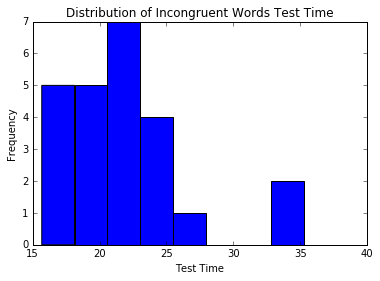

In [76]:
plt.hist(stroop.Incongruent, bins=8)
plt.xlabel('Test Time')
plt.ylabel('Frequency')
plt.title('Distribution of Incongruent Words Test Time')
plt.show()

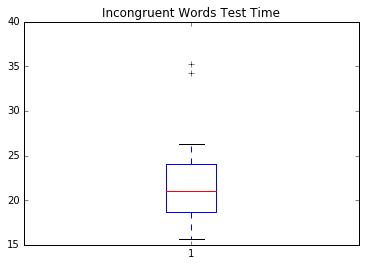

In [46]:
plt.boxplot(stroop.Incongruent)
plt.title('Incongruent Words Test Time')
plt.show()

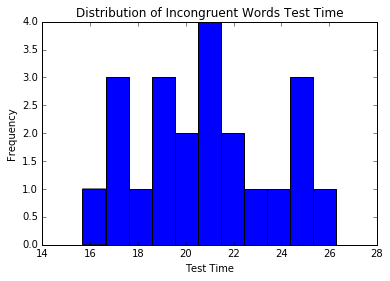

In [80]:
# histogram without outliers
plt.hist(stroop.Incongruent[stroop.Incongruent < 30], bins=11)
plt.xlabel('Test Time')
plt.ylabel('Frequency')
plt.title('Distribution of Incongruent Words Test Time')
plt.show()

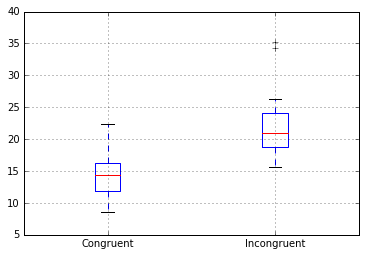

In [44]:
# two boxplots in one figure for convenience
stroop.boxplot(return_type='axes')

If we compare the two histograms, we'll see the data points in the Congruent sample can better be approximated by the normal distribution, and there are no gaps between the bins. At the same time, it's obvious the Incongruent sample contains 2 outliers sitting at around 35, which is supported by the boxplot that clearly marks theses points with crosses as outliers. After we build a new histogram with the outliers excluded, the graph looks better and can now also be approximated by the normal distribution. 

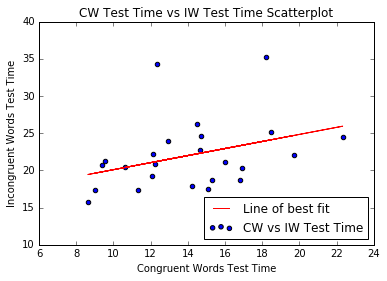

In [57]:
plt.scatter(stroop.Congruent, stroop.Incongruent, label='CW vs IW Test Time')
plt.xlabel('Congruent Words Test Time')
plt.ylabel('Incongruent Words Test Time')
plt.title('CW Test Time vs IW Test Time Scatterplot')
plt.plot(stroop.Congruent, np.poly1d(np.polyfit(stroop.Congruent, stroop.Incongruent, 1))(stroop.Congruent),
         color='red', label='Line of best fit')
plt.legend(loc=4)
plt.show()

Finally, a scatterplot shows an interesting, seemingly linear (as demonstrated by the line of best fit), relationship between the two samples. It looks like the longer it takes a person to name the ink colors under the congruent words condition, the more time they tend to spend naming the ink colors under the incongruent words condition. Clearly, there are exceptions to this observation, but the general trend is quite discernible.

**Q5: Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?**

**Answer:**

Our point estimate for the difference between two means is 22.015917 - 14.051125 = **7.964792**, but we would still want to know how this compares to other differences, so we need to calculate the standard error of differences. But first let's find the standard deviation of the differences between the two samples.

In [83]:
stroop['Difference'] = stroop.Incongruent - stroop.Congruent

In [85]:
# now we have a new column containing individual differences between the two samples
stroop.head(3)

,Congruent,Incongruent,Difference
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650


In [88]:
stroop.Difference.std()

4.864826910359056

Now that we know the standard deviation of the differences between the two samples, which is **4.864826910359056**, we can calculate the t-statistic: difference between two means divided by the the standard error of differences.

In [89]:
t = 7.964792 / (4.864826910359056 / (24 ** .5))
print 't-statistic is equal to', t

t-statistic is equal to 8.02070727978


The next step is to compare t value of **8.02070727978** to the t critical value that can be looked up in the t table. We'll use the $\alpha$ level of 0.01 (which corresponds to 99% confidence). Given 23 degrees of freedom and a one-tailed t-test, the t critical value comes out to **2.500**. It means that we can reject our null hypothesis $H_0$ with **p-value of less than 0.00001** (as calculated by [this site](http://www.socscistatistics.com/pvalues/tdistribution.aspx)). In other words, it took participants significantly longer to name the ink colors under the incongruent words condition that it did under the congruent words condition. These findings are in line with the assumption we made before the test about the brain needing additional time to process color differences. 

Our margin of error is 2.500 \* (4.864826910359056 / sqrt(24)), which is equal to **2.48257158**. To put it differently, on average,participants spent **between 5.48222 and 10.44736** seconds more trying to name the ink colors under the incongruent words condition.

Additionally, we can compute $r^2$, or the coefficient of determination, which, given t value of 8.02070727978 and 23 degrees of freedom, equals **0.73663**. That is, almost 74% of variance in test times can be attributed to the type of condition under which a participant was tested.

**Q6: Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!**

**Answer:**

I guess this effect has to do with the speed with which the human brain processes different kinds of information. It can be assumed it takes less time to read a word than to perceive a color; hence additional time needed to name the ink color in the incongruent words test: the person first reads the name of the color, then sees the color itself, then compares the two, and only after that says the name of the color, whereas in the congruent words test it's enough for the person to read the name of the color to give the correct response.

A similar task with a similar effect might be a test where participants are asked to compare two numbers. In the congruent part, a greater number is presented in a larger font; in the incongruent part, on the contrary, a smaller font is used for a greater number, which causes a certain degree of confusion and requires more time to process mentally.